## **Notebook EC#11**
## Interpretable Classification using a Decision Tree. This code is based on [this content](https://github.com/shuv50/Data-Science/blob/main/Decision_Tree_Classification.ipynb).
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula <br>


#### **Please, make the upload of the dataset [Social_Network_Ads.csv] before executing the code in the first part. The dataset is provided together with this code. More details in [the source link](https://www.kaggle.com/datasets/rakeshrau/social-network-ads?resource=download).**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Part 1: Social Network Dataset

In [2]:
# Read dataset
df_net = pd.read_csv('data/Social_Network_Ads.csv')
df_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Preprocessing

In [3]:
# Drop the column ID
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
# Describe data
df_net.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Distribution

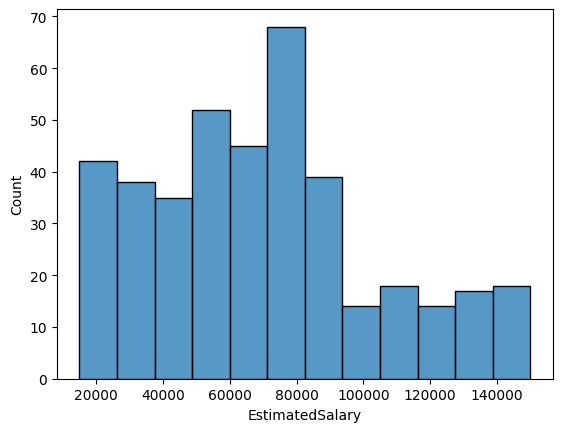

In [5]:
# Salary distribution
sns.histplot(df_net['EstimatedSalary'])
plt.show()

In [6]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [7]:
# Correlation matrix
df_net.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


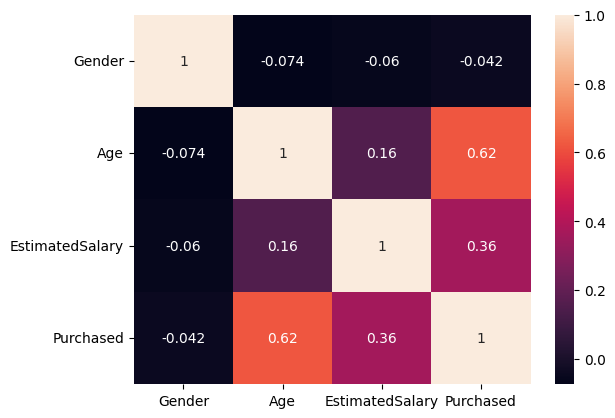

In [8]:
sns.heatmap(df_net.corr(), annot=True)
plt.show()

In [9]:
# Drop Gender column: it seems to be irrelevant, according to the correlation results
df_net.drop(columns=['Gender'], inplace=True)

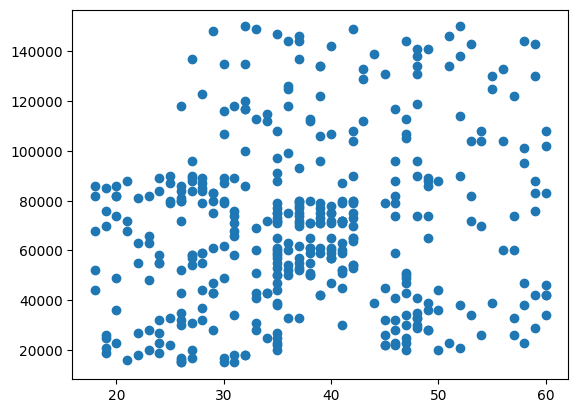

In [10]:
# Relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])
plt.show()

# Split data

In [11]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

## Train/Test sets

In [12]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Feature scaling

In [13]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [14]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predict result / Score model

In [15]:
# Prediction
y_pred = classifier.predict(X_test)

# Evaluate model

## Accuracy

In [16]:
# Accuracy for the training dataset
y_pred = classifier.predict(X_train)
accuracy_score(y_train, y_pred)

0.9966666666666667

In [17]:
# Accuracy for the test dataset
y_pred_test = classifier.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.83

## Classification report

In [18]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred_test)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        58
           1       0.78      0.83      0.80        42

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## F1 score

In [19]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred_test)}")

F1 Score : 0.8045977011494253


## Confusion matrix

<Axes: >

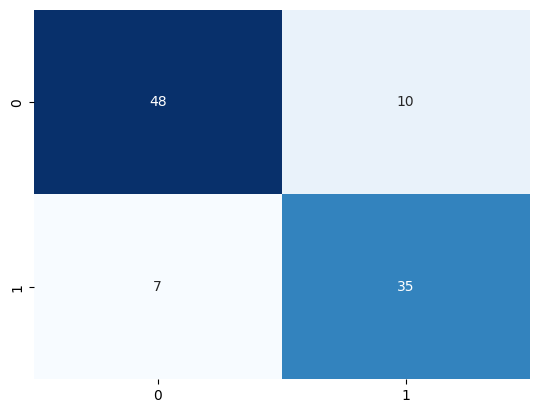

In [20]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

## Precision-Recall curve

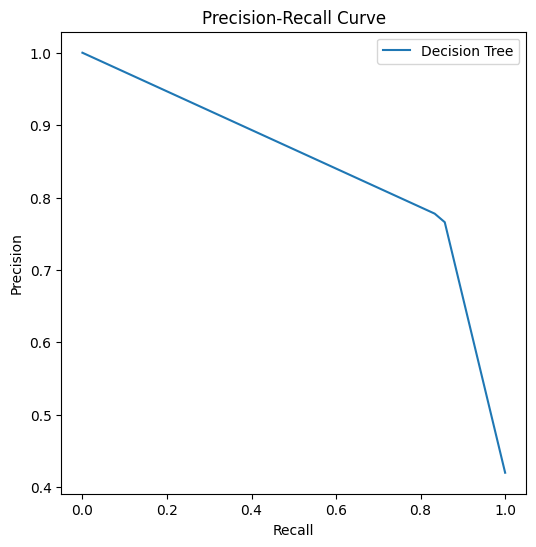

In [21]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Decision Tree')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

## AUC/ROC curve

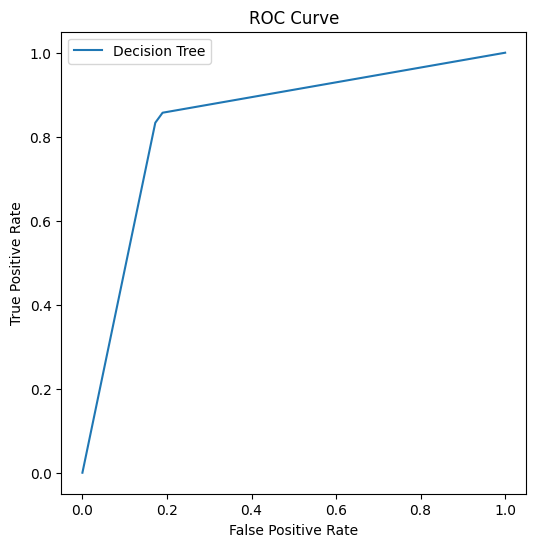

In [22]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

## Prediction on training set

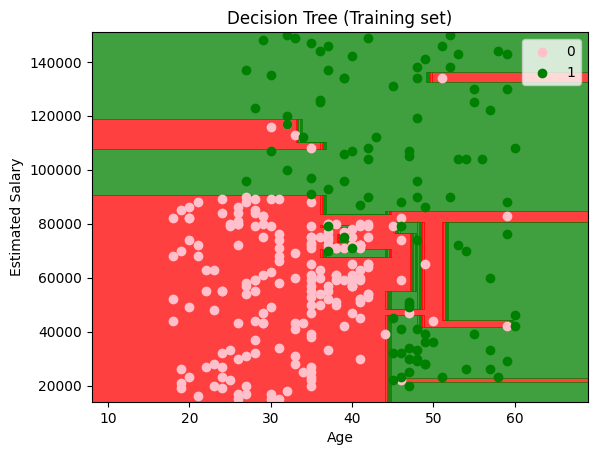

In [23]:
from matplotlib.colors import ListedColormap

# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['pink', 'green'])(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Prediction on test set

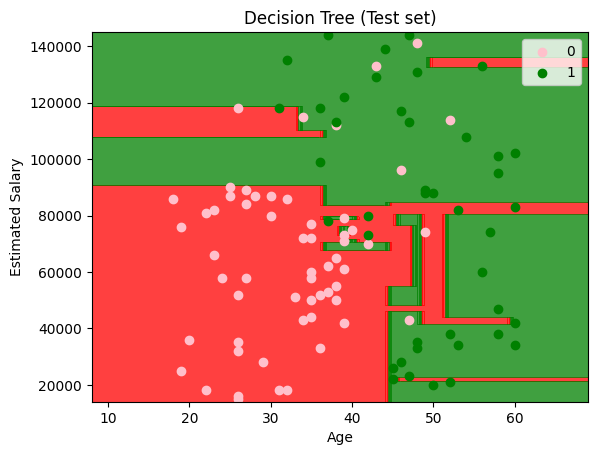

In [24]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['pink', 'green'])(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<font color="green">
Atividade (a) <br>
Como existem apenas duas entradas para o classificador, é possível visualizar a fronteira discriminante entre as classes. Ao analisar os dois gráficos acima, pode-se constatar que uma árvore de decisão é capaz de se "contorcer" bastante visando maximizar o acerto junto aos dados de treinamento. Com base na distribuição dos dados de teste, pode-se afirmar que o classificador se especializou demais e está produzindo overfitting? Para auxiliar em sua resposta, procure conferir o tamanho da árvore que foi produzida, ao executar as próximas células, a seguir.
</font>

Resposta:<br><br>
Sim. Além da fronteira discriminante muito contorcida, o número de nós e altura da árvore são consideravelmente grandes para um problema razoavelmente simples de duas entradas. Ademais, pode-se verificar o overfitting ao observar uma acurácia de 99,7% para os dados de treinamento e uma acurácia de 83% para os dados de teste, valores que indicam um cenário de overfitting bem tradicional: o modelo se tornou um especialista nos dados de treinamento- resultando na fronteira discriminante bem característica -, sendo incapaz de performar da mesma maneira diante de novos dados. 

In [25]:
# How to check a single example
# Predict purchase with Age(30) and Salary(87000)
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


In [26]:
# How to use text to visualize the tree: easy access to the corresponding rules
from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_0 <= 0.72
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.06
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.06
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.04
|   |   |   |   |   |--- feature_1 <= 0.43
|   |   |   |   |   |   |--- feature_0 <= 0.33
|   |   |   |   |   |   |   |--- feature_1 <= 0.31
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.28
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.13
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.21
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.21
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |

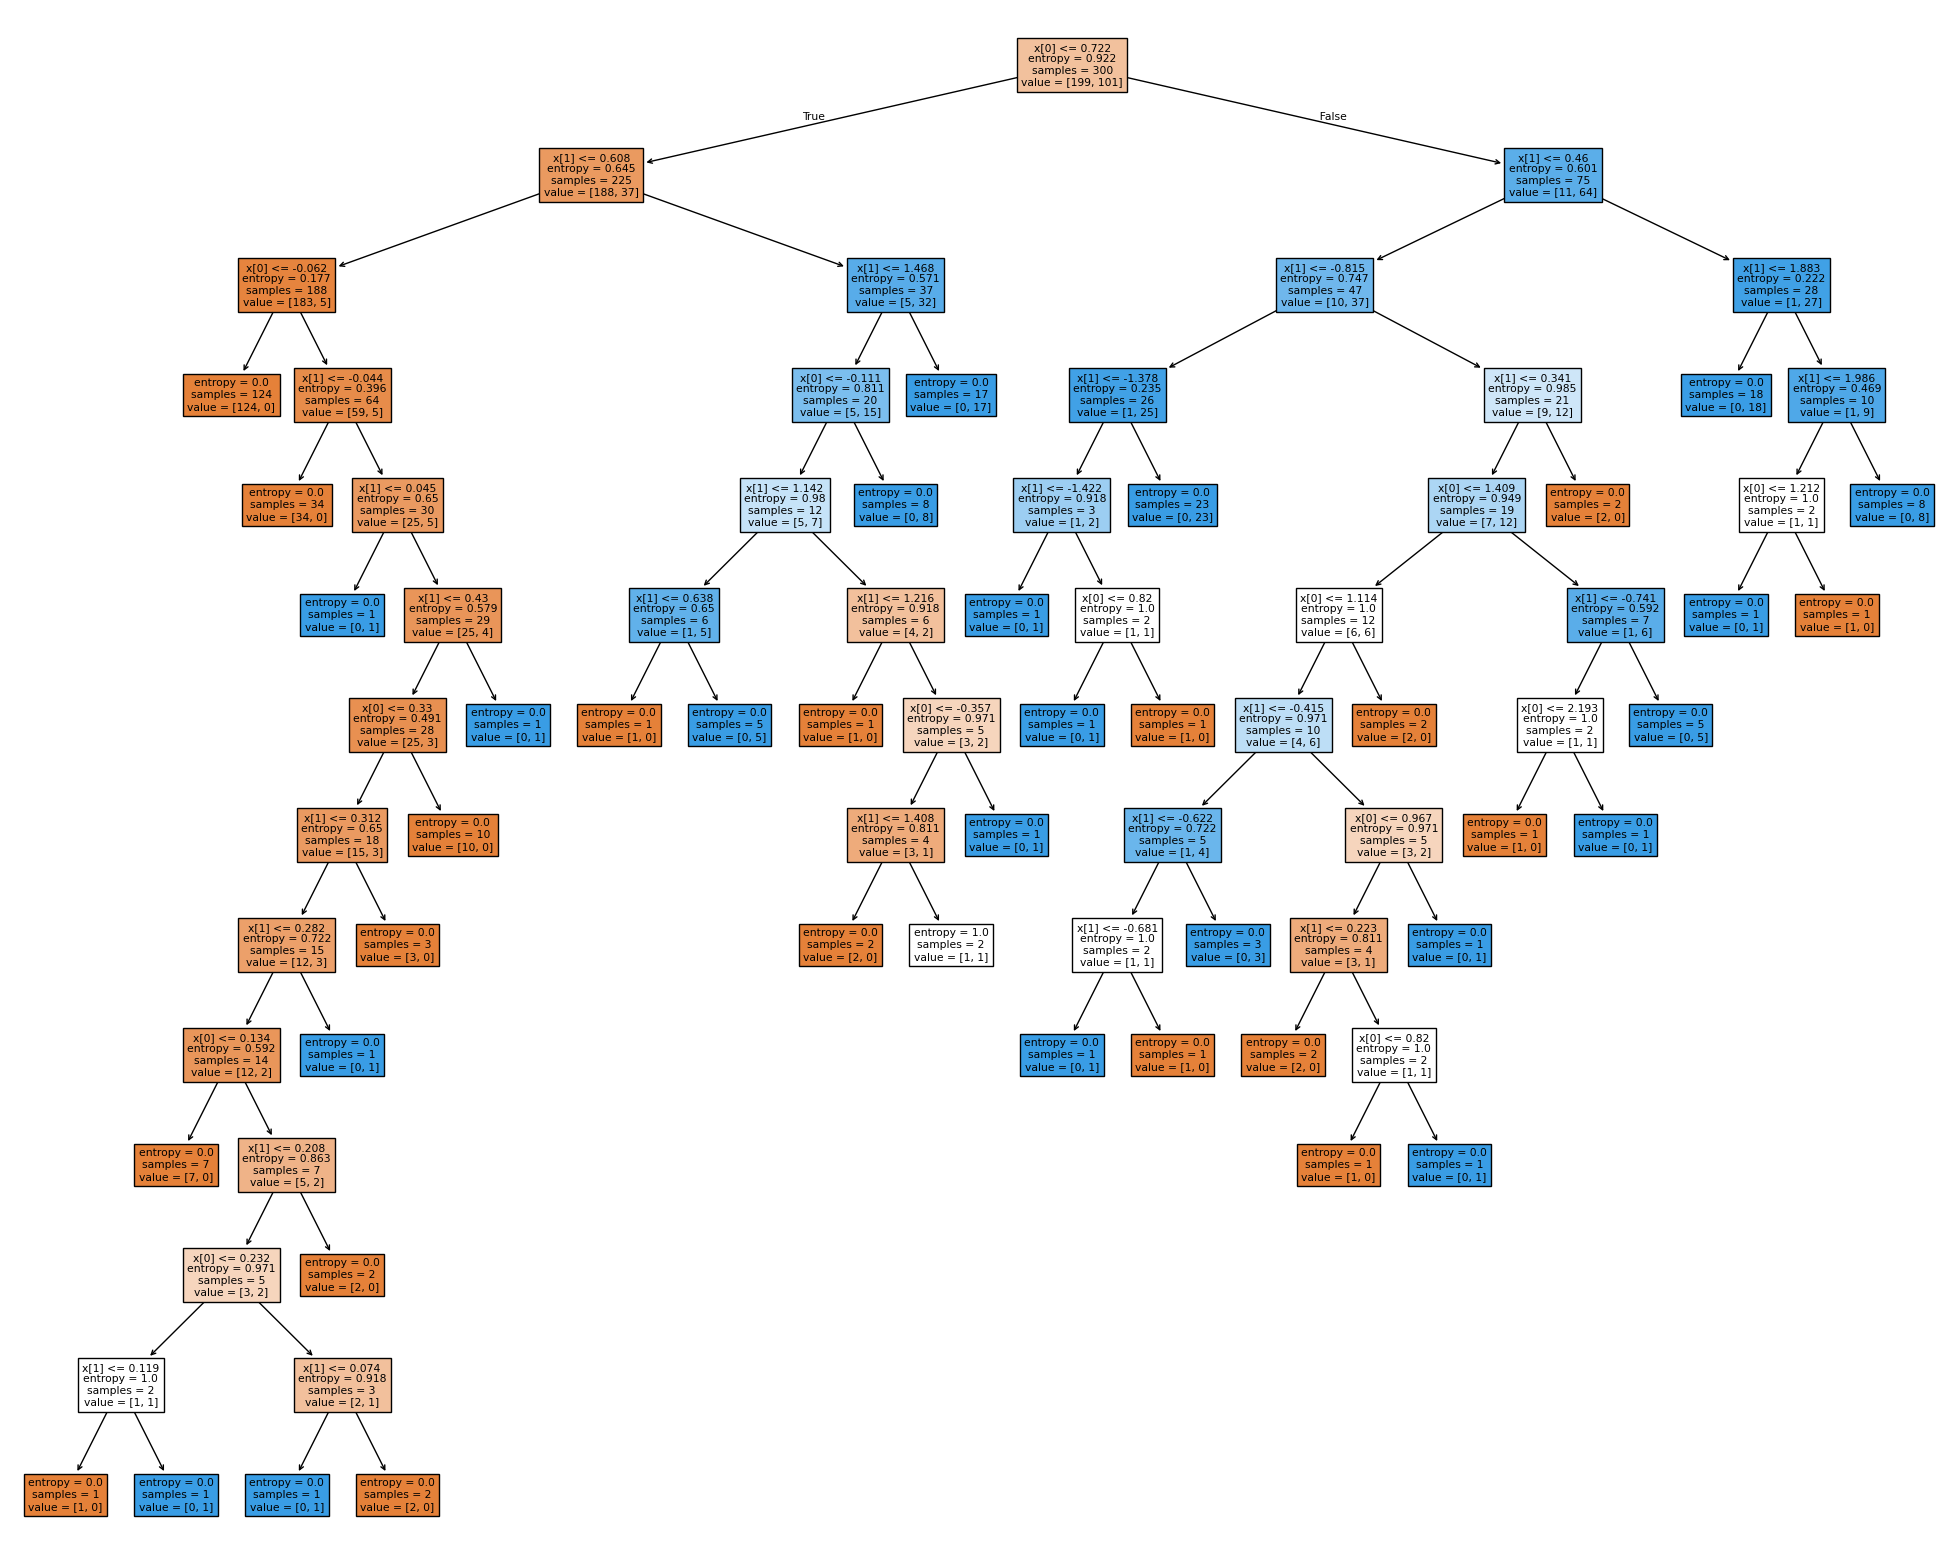

In [27]:
# How to visualize the tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,filled=True)
fig.savefig("decision_tree.png")

In [28]:
treeObj = classifier.tree_
print(treeObj.node_count)

81


In [29]:
def dectree_max_depth(tree):
    n_nodes = treeObj.node_count
    children_left = treeObj.children_left
    children_right = treeObj.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return (walk(root_node_id)-1)

dectree_max_depth(classifier)

13

# Part 2: The well-known Iris dataset. For more details, please refer to [this content](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [30]:
from sklearn.datasets import *

iris = load_iris()

X_iris = iris.data
y_iris = iris.target

# Split data into train/test sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size = 0.25, random_state = True)

In [31]:
dfIris = pd.DataFrame(iris.data)
dfIris.columns = [iris.feature_names]
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
dfIris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_iris_train, y_iris_train)

DecisionTreeClassifier()

In [34]:
y_iris_pred_test = decisiontree.predict(X_iris_test)
accuracy_score(y_iris_test, y_iris_pred_test)

0.9736842105263158

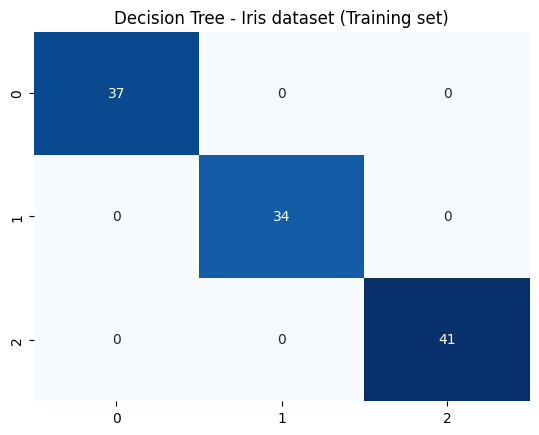

In [35]:
y_iris_pred = decisiontree.predict(X_iris_train)
cf_matrix = confusion_matrix(y_iris_train, y_iris_pred)
plt.title('Decision Tree - Iris dataset (Training set)')
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

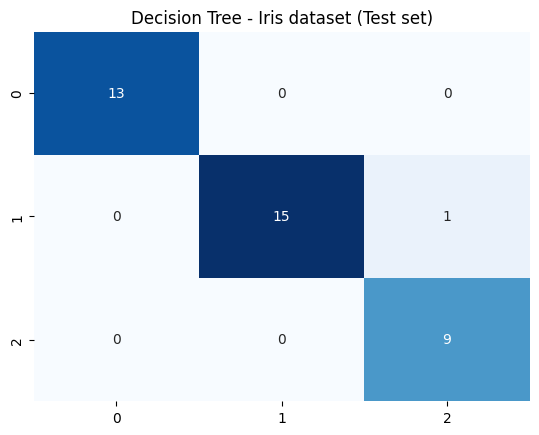

In [36]:
cf_matrix = confusion_matrix(y_iris_test, y_iris_pred_test)
plt.title('Decision Tree - Iris dataset (Test set)')
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [37]:
observation = [[ 5, 4, 3, 2]] # Predict observation's class
decisiontree.predict(observation)

array([1])

In [38]:
decisiontree.predict_proba(observation)

array([[0., 1., 0.]])

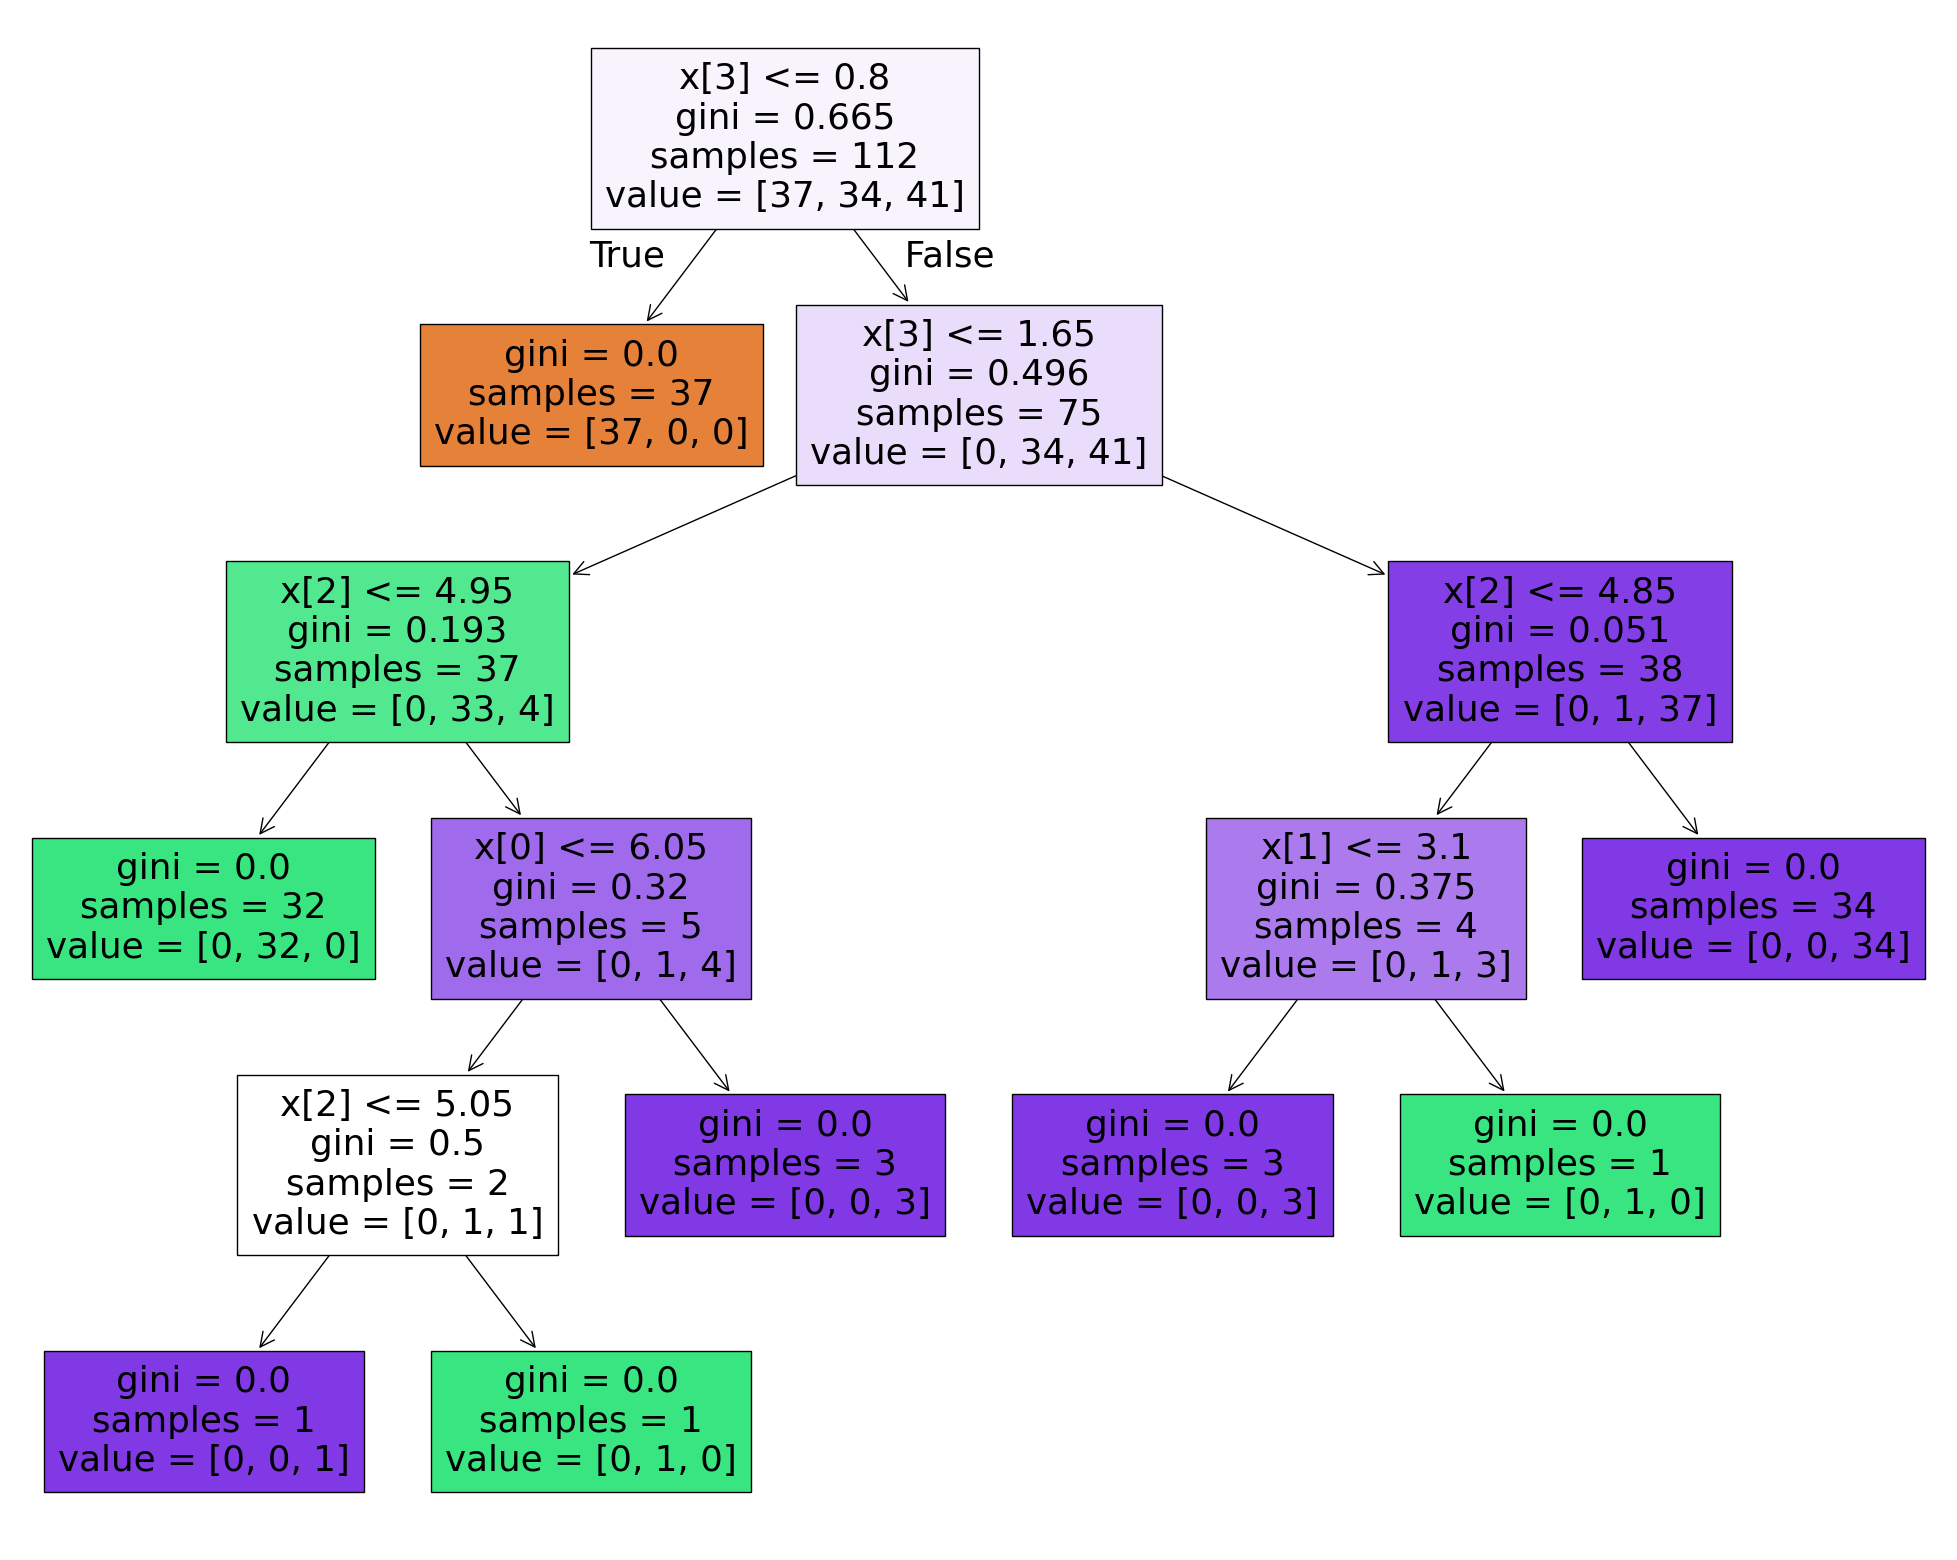

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree,filled=True)
fig.savefig("decision_tree_iris.png")

In [40]:
treeObj = decisiontree.tree_
print(treeObj.node_count)

15


In [41]:
dectree_max_depth(decisiontree)

5

In [42]:
decisiontree.feature_importances_

array([0.00805949, 0.02014872, 0.09379232, 0.87799947])

<font color="green">
Atividade (b) <br>
Embora o conceito de feature importance seja mais robusto no contexto de random forest, é possível obter feature importance a partir de uma única árvore de decisão. Há coerência entre a árvore retratada acima e os índices de feature importance apresentados como saída da célula de código logo acima? Por que o primeiro atributo de entrada foi considerado de importância nula?
</font>

Resposta:<br><br> Sim, há coerência. A penúltima e a última feature são decisivamente importantes para a árvore. Nota-se, especialmente com a última feature, uma discriminação muito satisfatória entre as classes - pequeno código abaixo visualizando a separação completa da espécie setosa no primeiro nó X[3] < 0.8. <br> 
Já a primeira feature, é utilizada apenas uma vez e em um nó com gini = 0.32, que indica pouca impureza entre as classes. Ou seja, é uma feature que foi utilizada de forma pontual e em um cenário de separação de classes não muito complicado (gini não muito elevado). <br>Ademais, uma comparação interessante pode ser feita com a feature 1. Tal feature também foi utilizada uma única vez, entretanto em um cenário com gini = 0.375 (um pouco maior) e com total discriminação posterior (os nós filhos possuem gini = 0, ou, equivalentemente, classes únicas). A feature 0, que possui a menor relevância de todas, ainda requer o uso da feature 2 subsequentemente, a fim de que haja total separação das classes na subárvore da qual é raiz. 

In [84]:
df = pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)], axis=1)
columns = [feature for feature in iris.feature_names]
columns.append("species")
df.columns = columns

In [85]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
_map = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}
df1 = df.copy()
df1['species'] = df1['species'].map(_map)

df1.sample(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
55,5.7,2.8,4.5,1.3,versicolor
120,6.9,3.2,5.7,2.3,virginica
31,5.4,3.4,1.5,0.4,setosa
57,4.9,2.4,3.3,1.0,versicolor
107,7.3,2.9,6.3,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
49,5.0,3.3,1.4,0.2,setosa
136,6.3,3.4,5.6,2.4,virginica


In [108]:
df1[df1.loc[:, 'petal width (cm)'] < 0.8] # x[3] < 0.8 separa a espécie setosa completamente. 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
